# Programming with Python

## Episode 1 - Introduction - Analyzing Patient Data

Teaching: 60 min, 
Exercises: 30 min 


Objectives
 
- Assign values to variables.

- Explain what a library is and what libraries are used for.

- Import a Python library and use the functions it contains.

- Read tabular data from a file into a program.

- Select individual values and subsections from data.

- Perform operations on arrays of data.

- Plot simple graphs from data.

## Our Dataset
In this episode we will learn how to work with CSV files in Python. Our dataset contains patient inflammation data - where each row represents a different patient and the column represent inflammation data over a series of days. 

![Data Files](data/inflammation-excel.png)


However, before we discuss how to deal with many data points, let’s learn how to work with single data values.



## Variables
Any Python interpreter can be used as a calculator:

```
3 + 5 * 4
```

In [2]:
3 + 5 * 4

23

This is great but not very interesting. To do anything useful with data, we need to assign its value to a variable. In Python, we can assign a value to a variable, using the equals sign =. For example, to assign value 60 to a variable weight_kg, we would execute:

```
weight_kg = 60
```

In [3]:
weight_kg = 60
print(type(weight_kg))

# this is an integer because no decimal points involved

<class 'int'>


From now on, whenever we use weight_kg, Python will substitute the value we assigned to it. In essence, a variable is just a name for a value.

```
weight_kg + 5
```

In [4]:
weight_kg + 5

65

In [5]:
print(weight_kg)

60


In Python, variable names:

- can include letters, digits, and underscores - `A-z, a-z, _`
- cannot start with a digit
- are case sensitive.

This means that, for example:

`weight0` is a valid variable name, whereas `0weight` is not. 
`weight` and `Weight` are different variables

#### Types of data
Python knows various types of data. Three common ones are:

- integer numbers (whole numbers)
- floating point numbers (numbers with a decimal point)
- and strings (of characters).

In the example above, variable `weight_kg` has an integer value of `60`. To create a variable with a floating point value, we can execute:

```
weight_kg = 60.0
```

In [6]:
weight_kg = 60.0
weight_kg_text = 'weight in kilograms:'

And to create a string we simply have to add single or double quotes around some text, for example:

```
weight_kg_text = 'weight in kilograms:'
```

To display the value of a variable to the screen in Python, we can use the print function:

```
print(weight_kg)
```

In [7]:
print(weight_kg)
print(type(weight_kg))
print(weight_kg_text)
print(type(weight_kg_text))

# type() is equivalent to class() in R

60.0
<class 'float'>
weight in kilograms:
<class 'str'>


We can display multiple things at once using only one print command:

```
print(weight_kg_text, weight_kg)
```

In [8]:
print(weight_kg_text,weight_kg)

weight in kilograms: 60.0


Moreover, we can do arithmetic with variables right inside the print function:

```
print('weight in pounds:', 2.2 * weight_kg)
```

In [9]:
print('weight in pounds: ',2.2 * weight_kg,'lb',sep='')

# default separator is a space. I'm changing it here so there's no separation by default
print('the print help doc:')
help(print) # for details

weight in pounds: 132.0lb
the print help doc:
Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



The above command, however, did not change the value of weight_kg:

```
print(weight_kg)
```

In [10]:
print(weight_kg)

60.0


To change the value of the `weight_kg` variable, we have to assign `weight_kg` a new value using the equals `=` sign:

```
weight_kg = 65.0
print('weight in kilograms is now:', weight_kg)
```

In [11]:
weight_kg = 65.0
print('weight in kilograms is now',weight_kg)

weight in kilograms is now 65.0


#### Variables as Sticky Notes

A variable is analogous to a sticky note with a name written on it: assigning a value to a variable is like writing a value on the sticky note with a particular name.

This means that assigning a value to one variable does not change values of other variables (or sticky notes). For example, let’s store the subject’s weight in pounds in its own variable:

```
# There are 2.2 pounds per kilogram
weight_lb = 2.2 * weight_kg
print(weight_kg_text, weight_kg, 'and in pounds:', weight_lb)
```

In [12]:
# there are 2.2lb per kg
weight_lb = 2.2*weight_kg
print(weight_kg_text,weight_kg,'and in pounds:',weight_lb)

weight in kilograms: 65.0 and in pounds: 143.0


#### Updating a Variable

Variables calculated from other variables do not change value just because the orignal variable change value (unlike cells in Excel):

```
weight_kg = 100.0
print('weight in kilograms is now:', weight_kg, 'and weight in pounds is still:', weight_lb)
```

In [13]:
weight_kg = 100.0
print('weight in kilograms is now:', weight_kg,'and weight in pounds is still:',weight_lb)

weight in kilograms is now: 100.0 and weight in pounds is still: 143.0


Since `weight_lb` doesn’t *remember* where its value comes from, so it is not updated when we change `weight_kg`.

In [14]:
# we'll have to update weight_lb to get the correct answer

weight_lb = weight_kg * 2.2

print(weight_kg)
print(weight_lb)
print('weight in kg:',weight_kg,'and weight in lbs:',weight_lb,'should now match up again')

# where is that phantom 0.0000000003 coming from?

100.0
220.00000000000003
weight in kg: 100.0 and weight in lbs: 220.00000000000003 should now match up again


## Libraries

Words are useful, but what’s more useful are the sentences and stories we build with them (or indeed entire books or whole libraries). Similarly, while a lot of powerful, general tools are built into Python, specialized tools built up from these basic units live in *libraries* that can be called upon when needed.

### Loading data into Python

In order to load our inflammation dataset into Python, we need to access (import in Python terminology) a library called `NumPy` (which stands for Numerical Python). 

In general you should use this library if you want to do fancy things with numbers, especially if you have matrices or arrays. We can import `NumPy` using:

```
import numpy
```

In [15]:
import numpy

Importing a library is like getting a piece of lab equipment out of a storage locker and setting it up on the bench. Libraries provide additional functionality to the basic Python package, much like a new piece of equipment adds functionality to a lab space. Just like in the lab, importing too many libraries can sometimes complicate and slow down your programs - so we only import what we need for each program. Once we’ve imported the library, we can ask the library to read our data file for us:

```
numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
```

The expression `numpy.loadtxt(...)` is a function call that asks Python to run the function `loadtxt` which belongs to the `numpy` library. **This dot `.` notation is used everywhere in Python: the thing that appears before the dot contains the thing that appears after.**

As an example, John Smith is the John that belongs to the Smith family. We could use the dot notation to write his name smith.john, just as `loadtxt` is a function that belongs to the `numpy` library.

`numpy.loadtxt` has two parameters: the name of the file we want to read and the delimiter that separates values on a line. These both need to be character strings (or strings for short), so we put them in quotes.

Since we haven’t told it to do anything else with the function’s output, the notebook displays it. In this case, that output is the data we just loaded. By default, only a few rows and columns are shown (with ... to omit elements when displaying big arrays). To save space, Python displays numbers as 1. instead of 1.0 when there’s nothing interesting after the decimal point.

Our call to `numpy.loadtxt` read our file but didn’t save the data in memory. To do that, we need to assign the array to a variable. Just as we can assign a single value to a variable, we can also assign an array of values to a variable using the same syntax. Let’s re-run `numpy.loadtxt` and save the returned data:

```
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
```

In [16]:
data = numpy.loadtxt(fname='data/inflammation-01.csv',delimiter=',')

#fname is file name, like file= would be in R
# delimiter is obvious

This statement doesn’t produce any output because we’ve assigned the output to the variable `data`. If we want to check that the data has been loaded, we can print the variable’s value:

```
print(data)
```

In [17]:
print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


Now that the data is in memory, we can manipulate it. First, let’s ask Python what type of thing `data` refers to:

```
print(type(data))
```

The output tells us that data currently refers to an N-dimensional array, the functionality for which is provided by the `NumPy` library. This data correspond to arthritis patients’ inflammation. The rows are the individual patients, and the columns are their daily inflammation measurements.

#### Data Type

A NumPy array contains one or more elements of the same type. The type function will only tell you that a variable is a NumPy array but won’t tell you the type of thing inside the array. We can find out the type of the data contained in the NumPy array.

```
print(data.dtype)
```

In [18]:
print(type(data)) # this tells me that the data object is a numpy array
print(data.dtype) # this tells me that the stuff in the array is floating point numbers

<class 'numpy.ndarray'>
float64


This tells us that the NumPy array’s elements are floating-point numbers.

With the following command, we can see the array’s shape:

```
print(data.shape)
```

In [19]:
print(data.shape) # the equivalent of R's print(nrow(data),ncol(data))

(60, 40)


The output tells us that the data array variable contains 60 rows and 40 columns. When we created the variable data to store our arthritis data, we didn’t just create the array; we also created information about the array, called members or attributes. This extra information describes data in the same way an adjective describes a noun. data.shape is an attribute of data which describes the dimensions of data. We use the same dotted notation for the attributes of variables that we use for the functions in libraries because they have the same part-and-whole relationship.

If we want to get a single number from the array, we must provide an index in square brackets after the variable name, just as we do in math when referring to an element of a matrix. Our inflammation data has two dimensions, so we will need to use two indices to refer to one specific value:

```
print('first value in data:', data[0, 0])
print('middle value in data:', data[30, 20])
```

In [20]:
# oh, here we bloody go >.< 

print('first value in data:',data[0,0])
print('middle value in data:',data[30,20])

first value in data: 0.0
middle value in data: 13.0


The expression `data[30, 20]` accesses the element at row 30, column 20. While this expression may not surprise you, `data[0, 0]` might. 

#### Zero Indexing

Programming languages like Fortran, MATLAB and R start counting at 1 because that’s what human beings have done for thousands of years. Languages in the C family (including C++, Java, Perl, and Python) **count from 0 because it represents an offset from the first value in the array (the second value is offset by one index from the first value).** 

*# why did no-one explain it like this to me before?! D: this makes so much more sense!* 

This is closer to the way that computers represent arrays (if you are interested in the historical reasons behind counting indices from zero, you can read Mike Hoye’s blog post). 

**As a result, if we have an M×N array in Python, its indices go from 0 to M-1 on the first axis and 0 to N-1 on the second.** It takes a bit of getting used to, but one way to remember the rule is that the index is how many steps we have to take from the start to get the item we want.

#### In the Corner

What may also surprise you is that when Python displays an array, it shows the element with index `[0, 0]` in the upper left corner rather than the lower left. This is consistent with the way mathematicians draw matrices but different from the Cartesian coordinates. The indices are (row, column) instead of (column, row) for the same reason, which can be confusing when plotting data.

#### Slicing data

An index like `[30, 20]` selects a single element of an array, but we can select whole sections as well. For example, we can select the first ten days (columns) of values for the first four patients (rows) like this:

```
print(data[0:4, 0:10])
```

In [21]:
print(data[0:4,0:10])

[[0. 0. 1. 3. 1. 2. 4. 7. 8. 3.]
 [0. 1. 2. 1. 2. 1. 3. 2. 2. 6.]
 [0. 1. 1. 3. 3. 2. 6. 2. 5. 9.]
 [0. 0. 2. 0. 4. 2. 2. 1. 6. 7.]]


The slice `[0:4]` means, *Start at index 0 and go up to, but not including, index 4*. 

Again, the up-to-but-not-including takes a bit of getting used to, but the rule is that the difference between the upper and lower bounds is the number of values in the slice.

Also, we don’t have to start slices at `0`:

```
print(data[5:10, 0:10])
```

In [22]:
print(data[5:10,0:10])

[[0. 0. 1. 2. 2. 4. 2. 1. 6. 4.]
 [0. 0. 2. 2. 4. 2. 2. 5. 5. 8.]
 [0. 0. 1. 2. 3. 1. 2. 3. 5. 3.]
 [0. 0. 0. 3. 1. 5. 6. 5. 5. 8.]
 [0. 1. 1. 2. 1. 3. 5. 3. 5. 8.]]


and we don’t have to include the upper or lower bound on the slice. 

If we don’t include the lower bound, Python uses 0 by default; if we don’t include the upper, the slice runs to the end of the axis, and if we don’t include either (i.e., if we just use `:` on its own), the slice includes everything:

```
small = data[:3, 36:]
print('small is:')
print(small)
```

In [23]:
small = data[:3,36:] # gives the first three rows (indices 0-2) and the last 4 columns (indices 36-39)
print('small is:')
print(small)

small is:
[[2. 3. 0. 0.]
 [1. 1. 0. 1.]
 [2. 2. 1. 1.]]


In [24]:
doubledata = data*2.0

will create a new array doubledata each element of which is twice the value of the corresponding element in data:

```
print('original:')
print(data[:3, 36:])
print('doubledata:')
print(doubledata[:3, 36:])
```

In [25]:
print('original:')
print(data[:3,36:])
print('doubledata:')
print(doubledata[:3,36:])

original:
[[2. 3. 0. 0.]
 [1. 1. 0. 1.]
 [2. 2. 1. 1.]]
doubledata:
[[4. 6. 0. 0.]
 [2. 2. 0. 2.]
 [4. 4. 2. 2.]]


If, instead of taking an array and doing arithmetic with a single value (as above), you did the arithmetic operation with another array of the same shape, the operation will be done on corresponding elements of the two arrays. Thus:

```
tripledata = doubledata + data
```

In [26]:
tripledata = doubledata + data

will give you an array where `tripledata[0,0]` will equal `doubledata[0,0]` plus `data[0,0]`, and so on for all other elements of the arrays.

```
print('tripledata:')
print(tripledata[:3, 36:])
```

In [27]:
print('tripledata:')
print(tripledata[:3,36:])

tripledata:
[[6. 9. 0. 0.]
 [3. 3. 0. 3.]
 [6. 6. 3. 3.]]


Often, we want to do more than add, subtract, multiply, and divide array elements. NumPy knows how to do more complex operations, too. If we want to find the average inflammation for all patients on all days, for example, we can ask NumPy to compute data’s mean value:

```
print(numpy.mean(data))
```

In [28]:
print(numpy.mean(data))

6.14875


`mean()` is a function that takes an array as an argument.

However, not all functions have input.

Generally, a function uses inputs to produce outputs. However, some functions produce outputs without needing any input. For example, checking the current time doesn’t require any input.

```
import time
print(time.ctime())
```

In [29]:
import time # import the time library
print(time.ctime()) # use the ctime function from the time library to reeturn the clock time

Wed Jul 24 02:20:13 2019


For functions that don’t take in any arguments, we still need parentheses `()` to tell Python to go and do something for us.

NumPy has lots of useful functions that take an array as input. Let’s use three of those functions to get some descriptive values about the dataset. We’ll also use *multiple assignment*, a convenient Python feature that will enable us to do this all in one line.

```
maxval, minval, stdval = numpy.max(data), numpy.min(data), numpy.std(data)
```

In [39]:
maxval,minval,stdval = numpy.max(data),numpy.min(data),numpy.std(data) 
# shorter way of writing this out so you don't have to do each thing on a separate line
#maxval = numpy.max(data)
#minval = numpy.min(data)
#stdval = numpy.std(data)

Here we’ve assigned the return value from `numpy.max(data)` to the variable `maxval`, the return value from `numpy.min(data)` to `minval`, and so on. 

Let'a have a look at the results:

```
print('maximum inflammation:', maxval)
print('minimum inflammation:', minval)
print('standard deviation:', stdval)
```

In [40]:
print('maximum inflammation:',maxval)
print('minimum inflammation:',minval)
print('standard deviation:',stdval)

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation: 4.613833197118566


#### Mystery Functions in IPython

How did we know what functions NumPy has and how to use them? 

If you are working in IPython or in a Jupyter Notebook (which we are), there is an easy way to find out. If you type the name of something followed by a dot `.`, then you can use `Tab` completion (e.g. type `numpy.` and then press `tab`) to see a list of all functions and attributes that you can use. 

In [41]:
 # hmm, he no worky...

After selecting one, you can also add a question mark `?` (e.g. `numpy.cumprod?`), and IPython will return an explanation of the method! 

This is the same as running `help(numpy.cumprod)`.

In [46]:
help(numpy.cumprod) # cumulative product. duh...

Help on function cumprod in module numpy:

cumprod(a, axis=None, dtype=None, out=None)
    Return the cumulative product of elements along a given axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        Axis along which the cumulative product is computed.  By default
        the input is flattened.
    dtype : dtype, optional
        Type of the returned array, as well as of the accumulator in which
        the elements are multiplied.  If *dtype* is not specified, it
        defaults to the dtype of `a`, unless `a` has an integer dtype with
        a precision less than that of the default platform integer.  In
        that case, the default platform integer is used instead.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output
        but the type of the resulting values will be cast if necessary.
    
    Returns


When analyzing data, though, we often want to look at variations in statistical values, such as the maximum inflammation per patient or the average inflammation per day. One way to do this is to create a new temporary array of the data we want, then ask it to do the calculation:

```
patient_0 = data[0, :]     # Comment: 0 on the first axis (rows), everything on the second (columns)
print('maximum inflammation for patient 0:', numpy.max(patient_0))
```

In [47]:
patient_0 = data[0,:] # top row, all columns therein
print('maximum inflammation for patient 0:', numpy.max(patient_0))

maximum inflammation for patient 0: 18.0


Everything in a line of code following the `#` symbol is a comment that is ignored by Python. Comments allow programmers to leave explanatory notes for other programmers or their future selves.

In [ ]:
# comments ftw!

We don’t actually need to store the row in a variable of its own. Instead, we can combine the selection and the function call:

```
print('maximum inflammation for patient 2:', numpy.max(data[2, :]))
```

In [48]:
print('maximum inflammation for patient 2:', numpy.max(data[2,:])) # max value in row 2

maximum inflammation for patient 2: 19.0


Operations Across Axes

What if we need the maximum inflammation for each patient over all days or the average for each day ? In other words want to perform the operation across a different axis.

To support this functionality, most array functions allow us to specify the axis we want to work on. If we ask for the average across axis 0 (rows in our 2D example), we get:

```
print(numpy.mean(data, axis=0))
```

In [49]:
print(numpy.mean(data,axis=0)) #oprates across the rows. takes the mean of all columns in each row

[ 0.          0.45        1.11666667  1.75        2.43333333  3.15
  3.8         3.88333333  5.23333333  5.51666667  5.95        5.9
  8.35        7.73333333  8.36666667  9.5         9.58333333 10.63333333
 11.56666667 12.35       13.25       11.96666667 11.03333333 10.16666667
 10.          8.66666667  9.15        7.25        7.33333333  6.58333333
  6.06666667  5.95        5.11666667  3.6         3.3         3.56666667
  2.48333333  1.5         1.13333333  0.56666667]


As a quick check, we can ask this array what its shape is:

```
print(numpy.mean(data, axis=0).shape)
```

In [50]:
print(numpy.mean(data,axis=0).shape) # this is like piping stuff. it takes the output of numpy.mean, calculates its shape, and then prints it
# 40 days (columns in data)
# 60 patients (rows in data)
print(numpy.mean(data,axis=0)) # operates across the rows. will sum all columns for each row
# average each day. I think

(40,)
[ 0.          0.45        1.11666667  1.75        2.43333333  3.15
  3.8         3.88333333  5.23333333  5.51666667  5.95        5.9
  8.35        7.73333333  8.36666667  9.5         9.58333333 10.63333333
 11.56666667 12.35       13.25       11.96666667 11.03333333 10.16666667
 10.          8.66666667  9.15        7.25        7.33333333  6.58333333
  6.06666667  5.95        5.11666667  3.6         3.3         3.56666667
  2.48333333  1.5         1.13333333  0.56666667]


The results (40,) tells us we have an N×1 vector, so this is the average inflammation per day for all 40 patients. If we average across axis 1 (columns in our  example), we use:

```
print(numpy.mean(data, axis=1))
```

In [51]:
print(numpy.mean(data,axis=1).shape) # this is like piping stuff. it takes the output of numpy.mean, calculates its shape, and then prints it
# 60 elements - the average inflammation of each patient
print(numpy.mean(data,axis=1)) # operates across the columns. will sum all rows for each column

(60,)
[5.45  5.425 6.1   5.9   5.55  6.225 5.975 6.65  6.625 6.525 6.775 5.8
 6.225 5.75  5.225 6.3   6.55  5.7   5.85  6.55  5.775 5.825 6.175 6.1
 5.8   6.425 6.05  6.025 6.175 6.55  6.175 6.35  6.725 6.125 7.075 5.725
 5.925 6.15  6.075 5.75  5.975 5.725 6.3   5.9   6.75  5.925 7.225 6.15
 5.95  6.275 5.7   6.1   6.825 5.975 6.725 5.7   6.25  6.4   7.05  5.9  ]


which is the average inflammation per patient across all days.

And if you are now confused, here's a simpler example:

```
tiny = [[   1,   2,   3],
        [  10,  20,  30],
        [ 100, 200, 300]]
        
print(tiny)
print('Sum the entire matrix: ', numpy.sum(tiny))
```

In [52]:
tiny = [[1,2,3],
       [10,20,30],
       [100,200,300]]

print(tiny)
print('sum the matrix:',numpy.sum(tiny))

[[1, 2, 3], [10, 20, 30], [100, 200, 300]]
sum the matrix: 666


Now let's add the rows (first axis, ie zeroth)

```
print('Sum the columns (ie add the rows): ', numpy.sum(tiny, axis=0))
```

In [53]:
print('column sums (adding all the rows in each column):',numpy.sum(tiny,axis=0)) 
print('column means:',numpy.mean(tiny,axis=0))

column sums (adding all the rows in each column): [111 222 333]
column means: [ 37.  74. 111.]


and now on the other dimension (axis=1, ie the second dimension)

```
print('Sum the rows (ie add the columns): ', numpy.sum(tiny, axis=1))
```

In [54]:
print('sum of each row (adding all the columns in each row):',numpy.sum(tiny,axis=1)) # sum of each row
print('row means:',numpy.mean(tiny,axis=1)) # mean of each row

sum of each row (adding all the columns in each row): [  6  60 600]
row means: [  2.  20. 200.]


### Visualising data

The mathematician Richard Hamming once said, “The purpose of computing is insight, not numbers,” and the best way to develop insight is often to visualize data.

Visualization deserves an entire workshop of its own, but we can explore a few features of Python’s `matplotlib` library here. While there is no official plotting library, `matplotlib` is the de facto standard. First, we will import the `pyplo` module from `matplotlib` and use two of its functions to create and display a heat map of our data:

```
import matplotlib.pyplot
plot = matplotlib.pyplot.imshow(data)
```

In [55]:
import matplotlib.pyplot

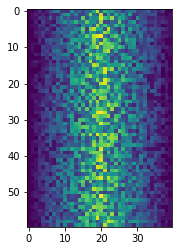

In [56]:
plot = matplotlib.pyplot.imshow(data)

#### Heatmap of the Data

Blue pixels in this heat map represent low values, while yellow pixels represent high values. As we can see, inflammation rises and falls over a 40-day period.

#### Some IPython Magic

If you’re using a Jupyter notebook, you’ll need to execute the following command in order for your matplotlib images to appear in the notebook when show() is called:

```
%matplotlib inline
```

In [101]:
%matplotlib inline

The `%` indicates an IPython magic function - a function that is only valid within the notebook environment. Note that you only have to execute this function once per notebook.

Let’s take a look at the average inflammation over time:

```
ave_inflammation = numpy.mean(data, axis=0)
ave_plot = matplotlib.pyplot.plot(ave_inflammation)
```

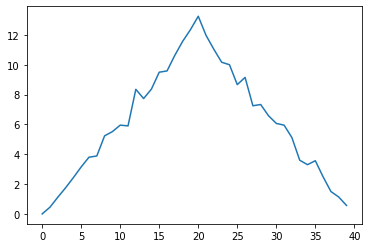

In [59]:
ave_inflammation = numpy.mean(data,axis=0) #average inflammation each day
ave_ploy = matplotlib.pyplot.plot(ave_inflammation)

Here, we have put the average per day across all patients in the variable `ave_inflammation`, then asked `matplotlib.pyplot` to create and display a line graph of those values. The result is a roughly linear rise and fall, which is suspicious: we might instead expect a sharper rise and slower fall. 

Let’s have a look at two other statistics, the maximum inflamation of all the patients each day:
```
max_plot = matplotlib.pyplot.plot(numpy.max(data, axis=0))
```

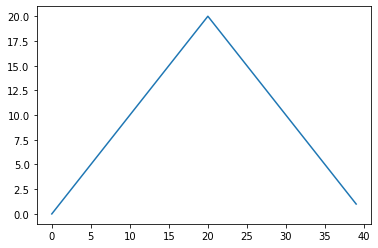

In [60]:
max_plot = matplotlib.pyplot.plot(numpy.max(data,axis=0))

... and the minimum inflamation across all patient each day ...
```
min_plot = matplotlib.pyplot.plot(numpy.min(data, axis=0))
matplotlib.pyplot.show()
```

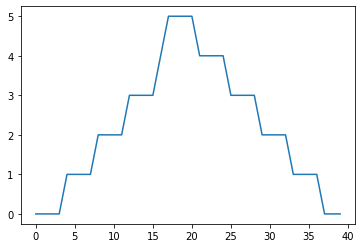

In [100]:
min_plot = matplotlib.pyplot.plot(numpy.min(data,axis=0))
matplotlib.pyplot.show()

The maximum value rises and falls smoothly, while the minimum seems to be a step function. Neither trend seems particularly likely, so either there’s a mistake in our calculations or something is wrong with our data. This insight would have been difficult to reach by examining the numbers themselves without visualization tools.

### Grouping plots

You can group similar plots in a single figure using subplots. This script below uses a number of new commands. The function `matplotlib.pyplot.figure()` creates a space into which we will place all of our plots. The parameter `figsize` tells Python how big to make this space. 

Each subplot is placed into the figure using its `add_subplot` method. The `add_subplot` method takes 3 parameters. The first denotes how many total rows of subplots there are, the second parameter refers to the total number of subplot columns, and the final parameter denotes which subplot your variable is referencing (left-to-right, top-to-bottom). Each subplot is stored in a different variable (`axes1`, `axes2`, `axes3`). 

Once a subplot is created, the axes can be labeled using the `set_xlabel()` command (or `set_ylabel()`). Here are our three plots side by side:


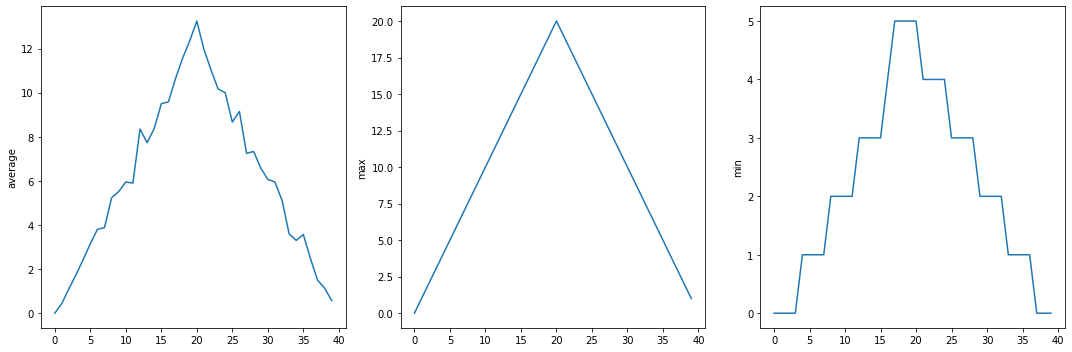

In [130]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(15.0, 5.0)) # set up the figure envorinoment. width 15, height 5

axes1 = fig.add_subplot(1, 3, 1) #dimensions of panel and location of this plot, named axes1 (1 row, 3 columns, goes in spot 1)
axes2 = fig.add_subplot(1, 3, 2) #dimensions of panel and location of this plot, named axes2 (1 row, 3 columns, goes in spot 2)
axes3 = fig.add_subplot(1, 3, 3) #dimensions of panel and location of this plot, named axes3 (1 row, 3 columns, goes in spot 3)

axes1.set_ylabel('average') #side label for axes1
plot = axes1.plot(numpy.mean(data, axis=0)) #plot axes1 

axes2.set_ylabel('max') #side label for plot 2
plot = axes2.plot(numpy.max(data, axis=0))

axes3.set_ylabel('min') #side label for plot 3
axes3.plot(numpy.min(data, axis=0))

fig.tight_layout()


##### The Previous Plots as Subplots

The call to `loadtxt` reads our data, and the rest of the program tells the plotting library how large we want the figure to be, that we’re creating three subplots, what to draw for each one, and that we want a tight layout. (If we leave out that call to fig.tight_layout()`, the graphs will actually be squeezed together more closely.)

Exercise: See if you add the label `Days` to the X-Axis of each subplot

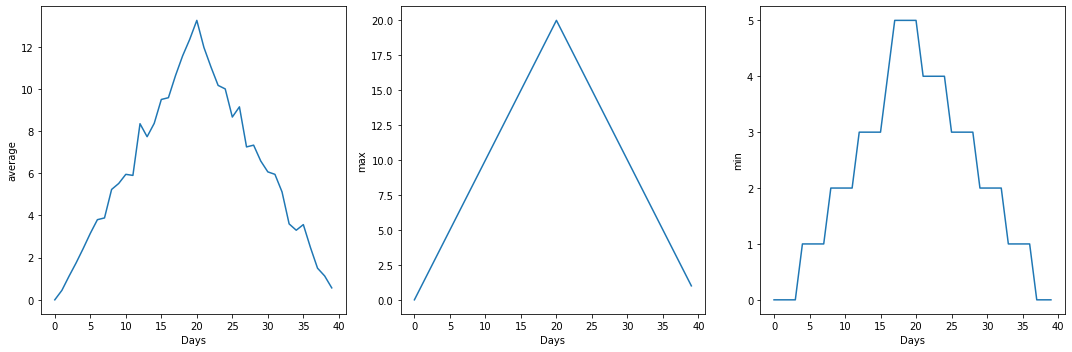

In [64]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(15.0, 5.0)) # set up the figure envorinoment. width 15, height 5

axes1 = fig.add_subplot(1, 3, 1) #dimensions of panel and location of this plot, named axes1 (1 row, 3 columns, goes in spot 1)
axes2 = fig.add_subplot(1, 3, 2) #dimensions of panel and location of this plot, named axes2 (1 row, 3 columns, goes in spot 2)
axes3 = fig.add_subplot(1, 3, 3) #dimensions of panel and location of this plot, named axes3 (1 row, 3 columns, goes in spot 3)

axes1.set_ylabel('average') #side label for axes1
axes1.set_xlabel('Days')
plot = axes1.plot(numpy.mean(data, axis=0)) #plot axes1 

axes2.set_ylabel('max') #side label for plot 2
axes2.set_xlabel('Days')
plot = axes2.plot(numpy.max(data, axis=0))

axes3.set_ylabel('min') #side label for plot 3
axes3.set_xlabel('Days')
axes3.plot(numpy.min(data, axis=0))

fig.tight_layout()



##### Scientists Dislike Typing. 
We will always use the syntax `import numpy` to import NumPy. However, in order to save typing, it is often suggested to make a shortcut like so: `import numpy as np`. If you ever see Python code online using a NumPy function with np (for example, `np.loadtxt(...))`, it’s because they’ve used this shortcut. When working with other people, it is important to agree on a convention of how common libraries are imported.

In other words:

```
import numpy
numpy.random.rand()
```

is the same as:

```
import numpy as np
np.random.rand()
```


In [129]:
import numpy as np
np.random.rand()

0.8613155045752338

## Exercises

### Variables

What values do the variables mass and age have after each statement in the following program? 
```
mass = 47.5
age = 122
mass = mass * 2.0a
age = age - 20
print(mass, age)
```
Test your answers by executing the commands.

In [70]:
mass = 47.5
age = 122
mass = mass *2.0
age = age - 20
print(mass,age)

95.0 102


Solution:

95.0,102

### Sorting Out References

What does the following program print out?
```
first, second = 'Grace', 'Hopper'
third, fourth = second, first
print(third, fourth)
```

In [72]:
first, second = 'Grace', 'Hopper'
third, fourth = first, second
print(third,fourth)

Grace Hopper


Solution:

`Grace Hopper`

### Slicing Strings
A section of an array is called a slice. We can take slices of character strings as well:
```
element = 'oxygen'
print('first three characters:', element[0:3])
print('last three characters:', element[3:6])
```

What is the value of `element[:4]` ? What about `element[4:]`? Or `element[:]` ?

What about `element[-1]` and `element[-2]` ?

In [77]:
element = 'oxygen'
print('first three characters:',element[0:3])
print('last three characters:', element[3:6])
print(element[-1])
print(element[-2])

first three characters: oxy
last three characters: gen
n
e


Solution:

Given those answers, explain what `element[1:-1]` does.

In [83]:
element[1:-1]
# hypothesis: will return x o n

# nope! it counts forward and stops before the -1 element
#x y g e

# what happens with element[-7]

# print(element[-7]) # this gives an out of range error, so it's not an infinite loop. it's a "count backwards from the end" thing

# what happens with element[-1:1]

# print(element[-1:1]) # running this returns empty, so again - no loopybois


'xyge'

Solution: 

### Thin Slices

The expression `element[3:3]` produces an empty string, i.e., a string that contains no characters. If data holds our array of patient data, what does `data[3:3, 4:4]` produce? What about `data[3:3, :]` ?

In [89]:
print(element[3:3]) # returns empty

data[3:3,4:4]
#returns a zero-dimensional array

data[3:3,:]
# returns a 0x40 array

array([], shape=(0, 40), dtype=float64)

Solution:

### Plot Scaling
Why do all of our plots stop just short of the upper end of our graph?

Solution:

If we want to change this, we can use the `set_ylim(min, max)` method of each ‘axes’, for example:
```
axes3.set_ylim(0,6)
```
Update your plotting code to automatically set a more appropriate scale. (Hint: you can make use of the max and min methods to help.)

minumum: 0.0
maximum: 13.25
minumum: 0.0
maximum: 20.0
minumum: 0.0
maximum: 5.0


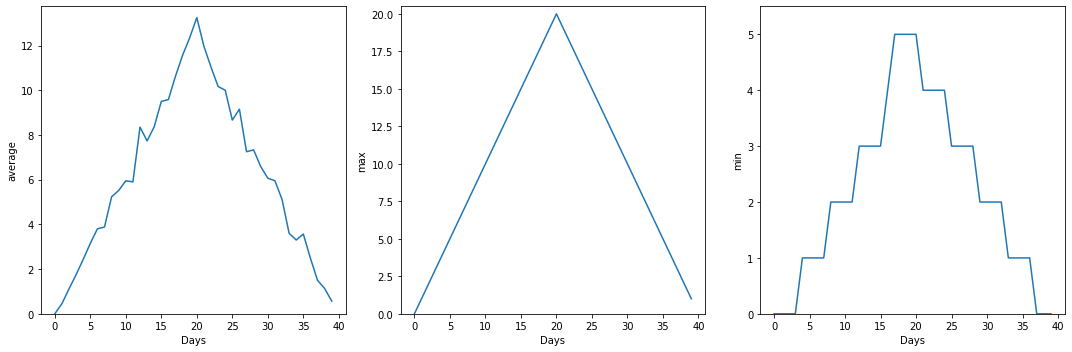

In [102]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(15.0, 5.0)) # set up the figure envorinoment. width 15, height 5

axes1 = fig.add_subplot(1, 3, 1) #dimensions of panel and location of this plot, named axes1 (1 row, 3 columns, goes in spot 1)
axes2 = fig.add_subplot(1, 3, 2) #dimensions of panel and location of this plot, named axes2 (1 row, 3 columns, goes in spot 2)
axes3 = fig.add_subplot(1, 3, 3) #dimensions of panel and location of this plot, named axes3 (1 row, 3 columns, goes in spot 3)

axes1.set_ylabel('average') #side label for axes1
axes1.set_xlabel('Days')
print('minumum:',numpy.min(numpy.mean(data,axis=0)))
print('maximum:',numpy.max(numpy.mean(data,axis=0)))
axes1.set_ylim(numpy.min(numpy.mean(data,axis=0)),numpy.max(numpy.mean(data,axis=0))+0.5)
plot = axes1.plot(numpy.mean(data, axis=0)) #plot axes1 

axes2.set_ylabel('max') #side label for plot 2
axes2.set_xlabel('Days')
print('minumum:',numpy.min(numpy.max(data,axis=0)))
print('maximum:',numpy.max(numpy.max(data,axis=0)))
axes2.set_ylim(numpy.min(numpy.max(data,axis=0)),numpy.max(numpy.max(data,axis=0))+0.5)
plot = axes2.plot(numpy.max(data, axis=0))

axes3.set_ylabel('min') #side label for plot 3
axes3.set_xlabel('Days')
print('minumum:',numpy.min(numpy.min(data,axis=0)))
print('maximum:',numpy.max(numpy.min(data,axis=0)))
axes3.set_ylim(numpy.min(numpy.min(data,axis=0)),numpy.max(numpy.min(data,axis=0))+0.5)
axes3.plot(numpy.min(data, axis=0))

fig.tight_layout()


### Drawing Straight Lines
In the center and right subplots above, we expect all lines to look like step functions because non-integer value are not realistic for the minimum and maximum values. However, you can see that the lines are not always vertical or horizontal, and in particular the step function in the subplot on the right looks slanted. Why is this?

Try adding a `drawstyle` parameter to your plotting:
```
axes2.set_ylabel('average')
axes2.plot(numpy.mean(data, axis=0), drawstyle='steps-mid')
```

minumum: 0.0
maximum: 13.25
minumum: 0.0
maximum: 20.0
minumum: 0.0
maximum: 5.0


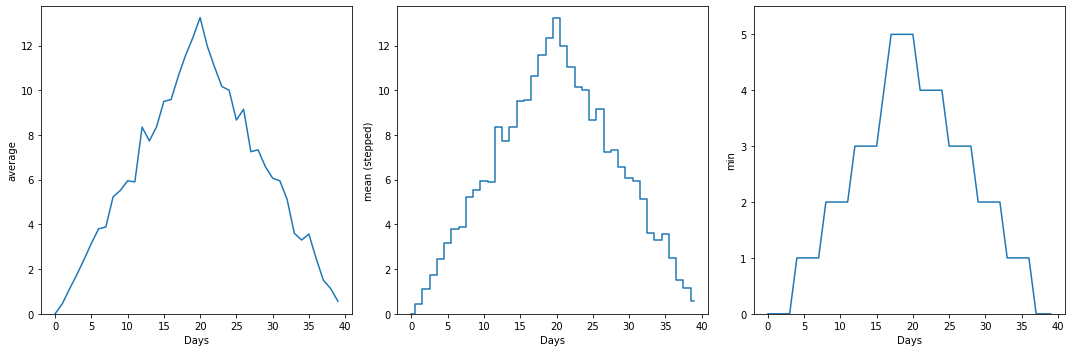

In [107]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(15.0, 5.0)) # set up the figure envorinoment. width 15, height 5

axes1 = fig.add_subplot(1, 3, 1) #dimensions of panel and location of this plot, named axes1 (1 row, 3 columns, goes in spot 1)
axes2 = fig.add_subplot(1, 3, 2) #dimensions of panel and location of this plot, named axes2 (1 row, 3 columns, goes in spot 2)
axes3 = fig.add_subplot(1, 3, 3) #dimensions of panel and location of this plot, named axes3 (1 row, 3 columns, goes in spot 3)

axes1.set_ylabel('average') #side label for axes1
axes1.set_xlabel('Days')
print('minumum:',numpy.min(numpy.mean(data,axis=0)))
print('maximum:',numpy.max(numpy.mean(data,axis=0)))
axes1.set_ylim(numpy.min(numpy.mean(data,axis=0)),numpy.max(numpy.mean(data,axis=0))+0.5)
plot = axes1.plot(numpy.mean(data, axis=0)) #plot axes1 

axes2.set_ylabel('mean (stepped)') #side label for plot 2
axes2.set_xlabel('Days')
print('minumum:',numpy.min(numpy.max(data,axis=0)))
print('maximum:',numpy.max(numpy.max(data,axis=0)))
axes2.set_ylim(numpy.min(numpy.mean(data,axis=0)),numpy.max(numpy.mean(data,axis=0))+0.5)
plot = axes2.plot(numpy.mean(data, axis=0), drawstyle='steps-mid')

axes3.set_ylabel('min') #side label for plot 3
axes3.set_xlabel('Days')
print('minumum:',numpy.min(numpy.min(data,axis=0)))
print('maximum:',numpy.max(numpy.min(data,axis=0)))
axes3.set_ylim(numpy.min(numpy.min(data,axis=0)),numpy.max(numpy.min(data,axis=0))+0.5)
axes3.plot(numpy.min(data, axis=0))

fig.tight_layout()

Solution:

### Make Your Own Plot
Create a plot showing the standard deviation (using `numpy.std`) of the inflammation data for each day across all patients.

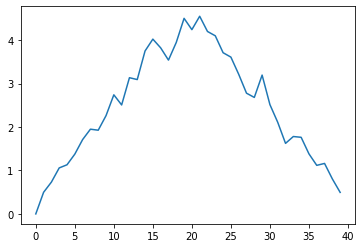

In [108]:
std_plot = matplotlib.pyplot.plot(numpy.std(data,axis=0))

### Moving Plots Around
Modify the program to display the three plots vertically rather than side by side.

minumum: 0.0
maximum: 13.25
minumum: 0.0
maximum: 20.0
minumum: 0.0
maximum: 5.0


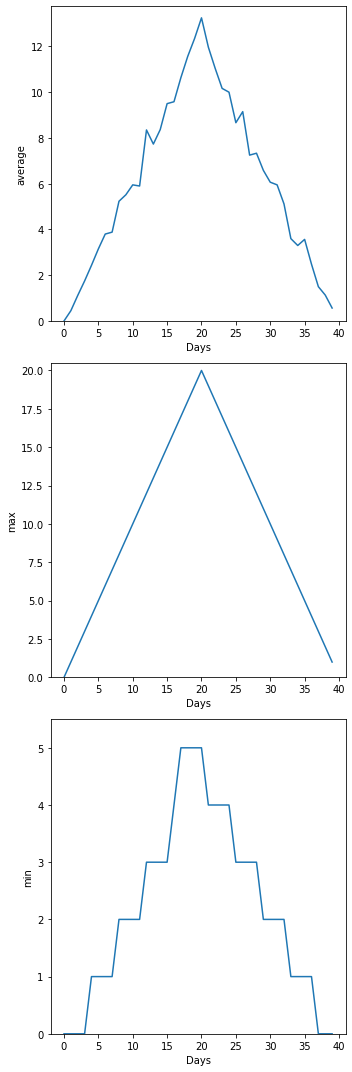

In [109]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(5.0, 15.0)) # set up the figure envorinoment. width 15, height 5

axes1 = fig.add_subplot(3, 1, 1) #dimensions of panel and location of this plot, named axes1 (1 row, 3 columns, goes in spot 1)
axes2 = fig.add_subplot(3, 1, 2) #dimensions of panel and location of this plot, named axes2 (1 row, 3 columns, goes in spot 2)
axes3 = fig.add_subplot(3, 1, 3) #dimensions of panel and location of this plot, named axes3 (1 row, 3 columns, goes in spot 3)

axes1.set_ylabel('average') #side label for axes1
axes1.set_xlabel('Days')
print('minumum:',numpy.min(numpy.mean(data,axis=0)))
print('maximum:',numpy.max(numpy.mean(data,axis=0)))
axes1.set_ylim(numpy.min(numpy.mean(data,axis=0)),numpy.max(numpy.mean(data,axis=0))+0.5)
plot = axes1.plot(numpy.mean(data, axis=0)) #plot axes1 

axes2.set_ylabel('max') #side label for plot 2
axes2.set_xlabel('Days')
print('minumum:',numpy.min(numpy.max(data,axis=0)))
print('maximum:',numpy.max(numpy.max(data,axis=0)))
axes2.set_ylim(numpy.min(numpy.max(data,axis=0)),numpy.max(numpy.max(data,axis=0))+0.5)
plot = axes2.plot(numpy.max(data, axis=0))

axes3.set_ylabel('min') #side label for plot 3
axes3.set_xlabel('Days')
print('minumum:',numpy.min(numpy.min(data,axis=0)))
print('maximum:',numpy.max(numpy.min(data,axis=0)))
axes3.set_ylim(numpy.min(numpy.min(data,axis=0)),numpy.max(numpy.min(data,axis=0))+0.5)
axes3.plot(numpy.min(data, axis=0))

fig.tight_layout()


### Stacking Arrays
Arrays can be concatenated and stacked on top of one another, using NumPy’s `vstack` and `hstack` functions for vertical and horizontal stacking, respectively.

Run the following code to view `A`, `B` and `C`


In [110]:
import numpy

A = numpy.array([[1,2,3], [4,5,6], [7, 8, 9]])
print('A = ')
print(A)

B = numpy.hstack([A, A]) # stacks horizontally - much like cbind()
print('B = ')
print(B)

C = numpy.vstack([A, A]) # stacks veertically, much like rbind()
print('C = ')
print(C)

A = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
B = 
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]
 [7 8 9 7 8 9]]
C = 
[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]
 [4 5 6]
 [7 8 9]]


Write some additional code that slices the first and last columns of `A`,
and stacks them into a 3x2 array. Make sure to print the results to verify your solution.

In [120]:
print(A[:,0]) # all rows from first column, but turns them into a listy thing
print(numpy.vstack(A[:,0])) # make them a 1x3 stack
print(numpy.vstack(A[:,2])) # make the last column aa 1x stack
result = numpy.hstack([numpy.vstack(A[:,0]),numpy.vstack(A[:,2])]) # paste the two columns next to each other. remember the [] to show it's an array

print(result)

[1 4 7]
[[1]
 [4]
 [7]]
[[3]
 [6]
 [9]]
[[1 3]
 [4 6]
 [7 9]]


### Change In Inflammation
This patient data is longitudinal in the sense that each row represents a series of observations relating to one individual. This means that the change in inflammation over time is a meaningful concept.

The `numpy.diff()` function takes a NumPy array and returns the differences between two successive values along a specified axis. For example, with the following `numpy.array`:

```
npdiff = numpy.array([ 0,  2,  5,  9, 14])
```

Calling `numpy.diff(npdiff)` would do the following calculations 

`2 - 0`, `5 - 2`, `9 - 5`, `14 - 9`

and produce the following array.

`[2, 3, 4, 5]`

In [ ]:
npdiff = numpy.array([ 0,  2,  5,  9, 14])
numpy.diff(npdiff)

In our `data` Which axis would it make sense to use this function along?

Solution

axis 1 - differences between successive columns to look at the change each day

If the shape of an individual data file is (60, 40) (60 rows and 40 columns), what would the shape of the array be after you run the diff() function and why?

Solution

should be 60 x 39

In [122]:
print(numpy.diff(data,axis=1).shape) # do the diffing, tell me what dimensions the new arry has

(60, 39)


How would you find the largest change in inflammation for each patient? Does it matter if the change in inflammation is an increase or a decrease?  Hint: NumPy has a function called `numpy.absolute()`,

In [128]:
diffdata = numpy.diff(data,axis=1)
print('biggest increase:',numpy.max(diffdata))
print('biggest decrease:',numpy.min(diffdata))

#help(numpy.absolute) # makes all values positive
print('biggest change in value:',numpy.max(numpy.absolute(diffdata)))

biggest increase: 13.0
biggest decrease: -14.0
biggest change in value: 14.0


Solution:

## Key Points
Import a library into a program using import library_name.

Use the numpy library to work with arrays in Python.

Use `variable` `=` `value` to assign a value to a variable in order to record it in memory.

Variables are created on demand whenever a value is assigned to them.

Use `print(something)` to display the value of something.

The expression `array.shape` gives the shape of an array.

Use `array[x, y]` to select a single element from a 2D array.

Array indices start at 0, not 1.

Use `low:high` to specify a slice that includes the indices from low to high-1.

All the indexing and slicing that works on arrays also works on strings.

Use `#` and some kind of explanation to add comments to programs.

Use `numpy.mean(array)`, `numpy.max(array)`, and `numpy.min(array)` to calculate simple statistics.

Use `numpy.mean(array, axis=0)` or `numpy.mean(array, axis=1)` to calculate statistics across the specified axis.

Use the `pyplot` library from `matplotlib` for creating simple visualizations.

### Save, and version control your changes

- save your work: `File -> Save`
- add all your changes to your local repository: `Terminal -> git add .`
- commit your updates a new Git version:  `Terminal -> git commit -m "End of Episode 2"`
- push your lastest commits to GitHub: `Terminal -> git push`